<a href="https://colab.research.google.com/github/ashwin2k/Hand-Written-digits-recognition/blob/master/MNIST_hand_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist

In [ ]:
(X_train, Y_train),(X_test,Y_test)=mnist.load_data()


In [ ]:
import matplotlib.pyplot as plt

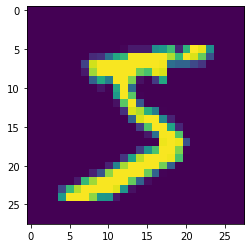

In [ ]:
plt.imshow(X_train[0])

In [ ]:
Y_train[0]

5

In [ ]:
X_train.size

47040000

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
from keras.utils import to_categorical


In [ ]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
import tensorflow as tf


In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(30,kernel_size=(3,3),input_shape=(28,28,1)))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
import tensorflow as tf

In [ ]:
model.add(Dense(130,activation=tf.nn.relu))

In [ ]:
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x=X_train,y=Y_train,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.7817 - accuracy: 0.8619
Epoch 2/10
60000/60000 [==============================] - 7s 125us/step - loss: 0.2593 - accuracy: 0.9299
Epoch 3/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.2090 - accuracy: 0.9437
Epoch 4/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.1863 - accuracy: 0.9508
Epoch 5/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.1659 - accuracy: 0.9553
Epoch 6/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.1579 - accuracy: 0.9589
Epoch 7/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.1431 - accuracy: 0.9628
Epoch 8/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.1444 - accuracy: 0.9624
Epoch 9/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.1404 - accuracy: 0.9645
Epoch 10/10
60000/60000 [=====================

In [ ]:
model.evaluate(X_test,Y_test)

10000/10000 [==============================] - 1s 62us/step


[0.18906014359057843, 0.9700999855995178]

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


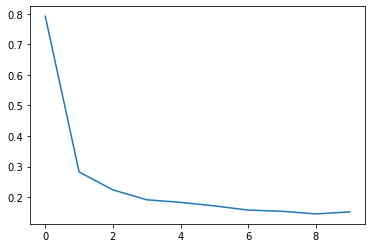

In [ ]:
plt.plot(history.history['loss'])

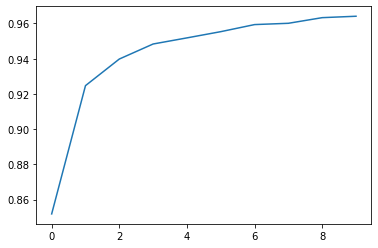

In [ ]:
plt.plot(history.history['accuracy'])

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
learnrate=[0.001,0.1,0.2,0.3,0.01]

In [ ]:
dropoutrate=[0.2,0.3,0.4,0.5,0.6,0.7,0.8]

In [ ]:
neuron=[80,90,100,110,130,140,150]

In [ ]:
epoch=[6,7,8,9,10,11]

In [ ]:
param=dict(learn_rate=learnrate,dropout_rate=dropoutrate,neurons=neuron,epochs=epoch)

In [ ]:
def build_model(dropout_rate,neurons,learn_rate,epochs):
 # dropout_rate=0.2
 # neurons=128

  model=Sequential()
  model.add(Conv2D(30,kernel_size=(3,3),input_shape=(28,28,1)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(neurons,activation=tf.nn.relu))
  model.add(Dropout(dropout_rate))
  model.add(Dense(10,activation='softmax'))
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
opt_model=KerasClassifier(build_fn=build_model,batch_size=1000,epochs=10)

In [ ]:
randm=RandomizedSearchCV(estimator=opt_model,param_distributions =param,n_jobs=-1,verbose=10)

In [ ]:
rand_res.best_score_

0.9603833436965943

In [ ]:
rand_res.best_params_

{'dropout_rate': 0.3, 'epochs': 10, 'learn_rate': 0.001, 'neurons': 130}

In [ ]:
grid_result=grid.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KeyboardInterrupt: ignored